Introduction
================
https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

**Simple regression**

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

y=mx+b

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

f(x,y,z)=w1x+w2y+w3z


Given our simple linear equation y=mx+b, we can calculate MSE as:

$ MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2} $

We then aim to minismise this by varying the weights of the model such that the MSE is reduced, moving upwards the gradient of the cost function.

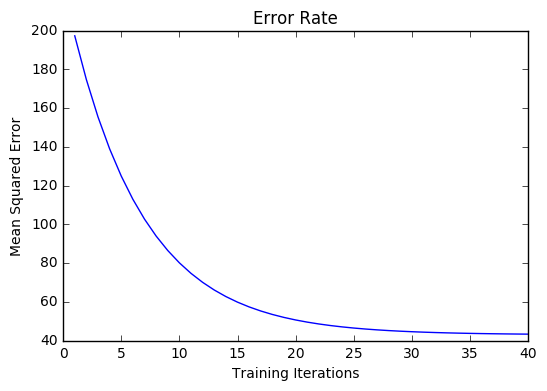


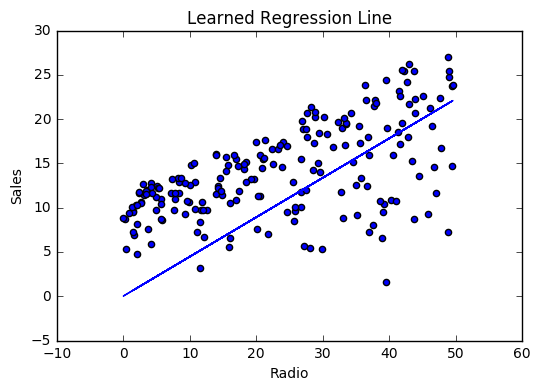

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import preprocessing_ml as pp
from sklearn.metrics import accuracy_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" # "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

#This is required to accept any changes to the module by forcing notebook to re-read the file 
#if any changes are made to the module while notebook is running
%load_ext autoreload
%autoreload 2


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Logistic Regression + K-neighbours
-----------------

In [2]:
def log_regressor(X_train, y_train,r_state=0, v =False):
    '''Do linear regression fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - v (optional): boolean verbose
    - r_state (optional): random seed for logistic regression
    '''
    from sklearn.linear_model import LogisticRegression
    
    LR = LogisticRegression(random_state=r_state)
    LR = LR.fit(X_train, y_train) 
    
    if v == True:
        print('Calculating logistic regressor......')
    
    return LR
    


In [3]:
def k_neighbors(X_train, y_train, v=0,  n_neighbors= 16):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = 16: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    
    KN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KN.fit(X_train, y_train) 
    
    if v == 1:
        print('Calculating k-neighbours......')
        
    return KN



In [4]:
def support_vector_m(X_train, y_train, r_state=0,v=0,class_weight='balanced'):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.svm import SVC
    
    if v == 1:
        print('\nCalculating Support vector machine ..\n')
        
    SVM = SVC(C=1, kernel='linear', class_weight=class_weight, probability=True, random_state=r_state) # penalize,
    SVM.fit(X_train, y_train) 
    
    return SVM

Measures of success
---------------

In [5]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
    
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

    if model == 'fram': # cheap and dirty fix for framingham data needing different processing
        y_pred = X_test > cutoff*100 
    else:
        y_pred = model.predict_proba(X_test)
        y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        print('\n========\nCuttoff: ',cutoff)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    

    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                      recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
        return a



    
# measure = cross_val(k_neighbors(X_train, X_test, y_train, y_test), X_train, y_train,scoring=['accuracy'])

# measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)

Optimising
---------------

In [6]:
#Read in from pre-determined csv of framingham percentages and whether the patient actually got CHD.
df_fram = pd.read_csv("Framingham Score/fram_risk.csv",index_col="index")[['TenYearCHD','fram_percent']]
df_fram.head()



,TenYearCHD,fram_percent
index,,
0,0,0.905684
1,0,1.004992
2,0,16.647594
3,1,8.771542
4,0,8.621980


In [7]:
dataset = pd.read_csv('framingham.csv')

from statsmodels.tools import add_constant as add_constant
dataset_c = add_constant(dataset)
dataset_c.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



LR summary:
Accuracy max=0.8554
Precision max=1.0000
Recall max=0.0992
f1_score max=0.1739


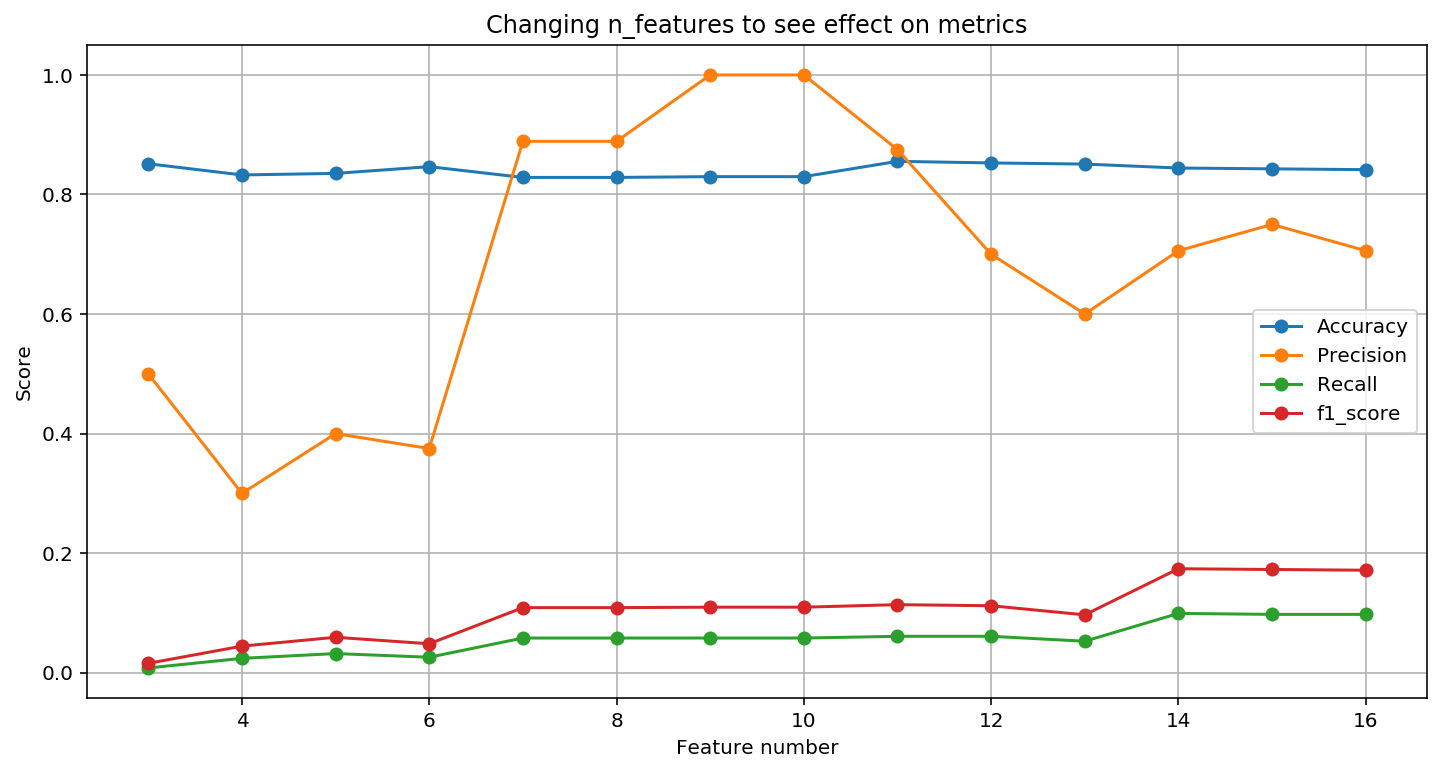

In [8]:
# Finally use all the functions I made to investigate preprocessing of dataset:
# features = ['TenYearCHD','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
#             'diabetes', 'BPMeds','male', 'BMI', 'prevalentStroke',
#             'education', 'heartRate', 'currentSmoker'] # for reference


features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate','prevalentStroke'] 

#Investigate effect of no. features
results_logreg = []
for i in range(3,len(features)+1):

    dataset_t = pp.chose_features(dataset_c, features=features[:i]) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    dataset_t = pp.scale_data(dataset_t)

    #No resampling
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset 

    #with resampling
#     train, test = pp.split_data(dataset_t,split_dep_var=False)
#     train = pp.upsample(train,v=0)
#     X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
    
    LR = log_regressor(X_train,y_train)

    results_logreg.append(performance(LR,X_test,y_test,output= 'All'))
    


results_logreg = pd.DataFrame(results_logreg,columns=['Accuracy','Precision','Recall','f1_score'])


plt.figure(figsize=(12, 6))
print('\nLR summary:')
for metric in results_logreg.columns:
    plt.plot(range(3,i+1), results_logreg[metric],label=metric,marker='o')
    print(metric, "max={:.4f}".format(max(results_logreg[metric])))
     
plt.grid()
plt.title('Changing n_features to see effect on metrics')
plt.xlabel('Feature number')
plt.ylabel('Score')
plt.legend()




0.0 %, 10.0 %, 20.0 %, 30.0 %, 40.0 %, 50.0 %, 60.0 %, 70.0 %, 80.0 %, 90.0 %, 

Max: n_features    15.000000
max_score      0.490141
Name: 8, dtype: float64


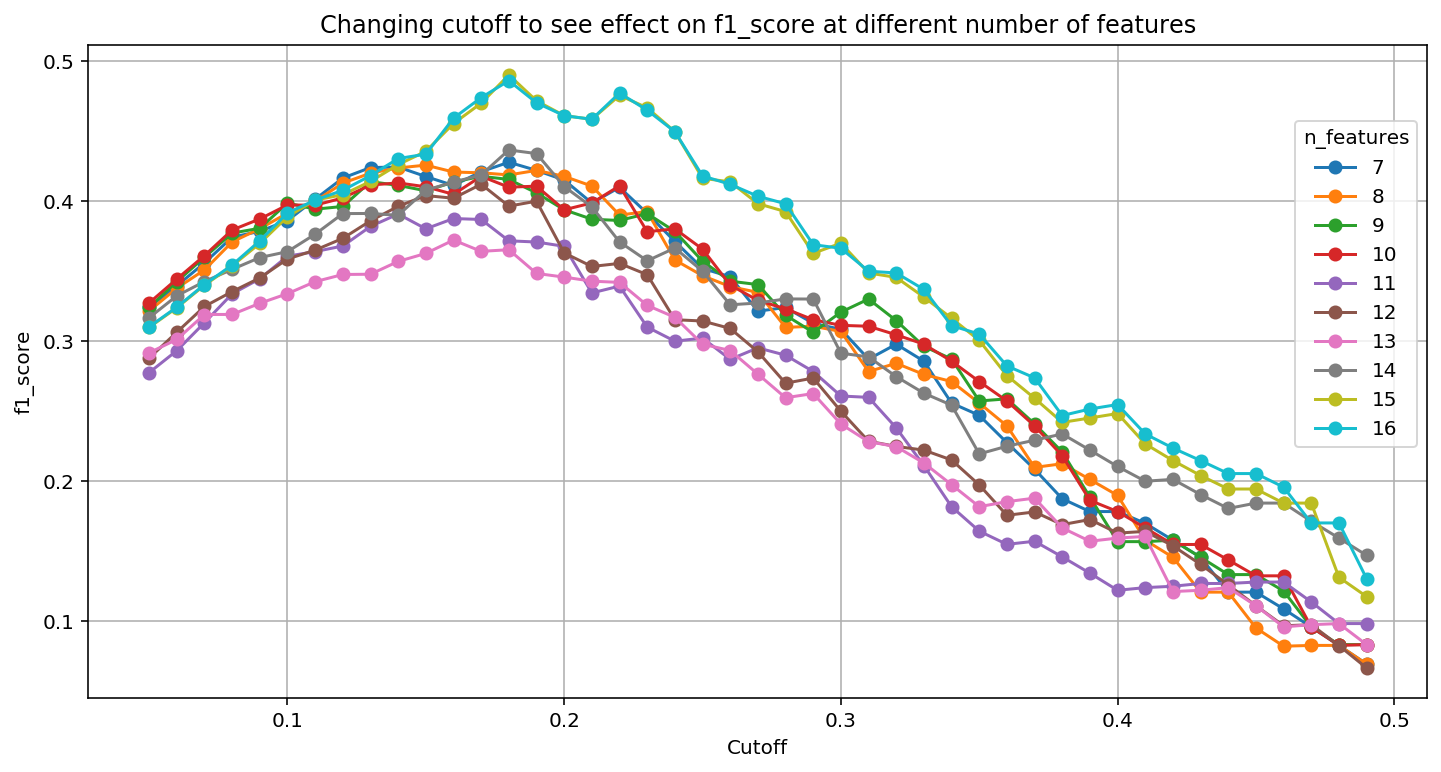

In [9]:
range_x = np.arange(0.05, 0.5, 0.01)

features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate','prevalentStroke'] 

#Investigate effect of no. features at different cuttoff
plt.figure(figsize=(12, 6))
measure = 'f1_score'

s = 7
maxes=[]

for n_features in range(s,len(features)+1):
    print((n_features-s)/(len(features)+1-s)*100,'%, ',end='')
    results = []
    dataset_t = pp.chose_features(dataset_c, features=features[:n_features]) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
#     dataset_t = pp.scale_data(dataset_t)

    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    
    ML = log_regressor(X_train, y_train)   
    #ML = k_neighbors(X_train, y_train)
#     ML = support_vector_m(X_train, y_train)
    
    for cutoff in range_x:
        results.append(performance(ML,X_test,y_test,cutoff=cutoff,output=measure))
    
    plt.plot(range_x, results,label=n_features,marker='o')
    maxes.append([n_features,max(results)])

    
maxes=pd.DataFrame(maxes,columns=['n_features','max_score'])    
print("\n\nMax:",maxes.iloc[maxes['max_score'].idxmax()])

plt.grid()
plt.title('Changing cutoff to see effect on {} at different number of features'.format(measure))
plt.xlabel('Cutoff')
plt.ylabel(str(measure))
plt.legend(title="n_features", bbox_to_anchor=(1, 0.9))


AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

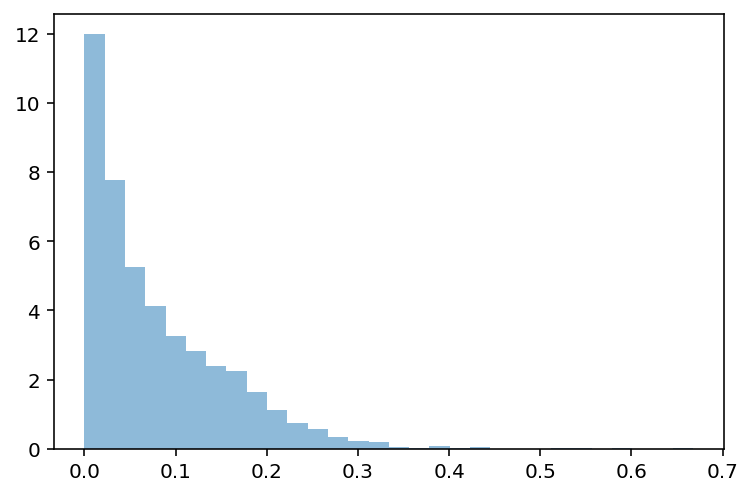

In [10]:
#histogram of freq of each % chance... .suggests rebalancing required

def t_plot_hist(y_pred,label,gaussian=True):
#     l_bins = list(np.arange(0,1.01,0.05))
    n, bins, patches = plt.hist(y_pred, bins = 30,alpha=0.5,label=label,density=1)
    
    if gaussian == True:
        from scipy.stats import norm
        import matplotlib.mlab as mlab

        (mu, sigma) = norm.fit(y_pred)

        y = mlab.normpdf( bins, mu, sigma)
        l = plt.plot(bins, y, 'r--', linewidth=2)

        plt.axvline(x=mu,linewidth=1, color='k',linestyle='--',label=r'$\sigma = {}$'.format(round(mu,3))) #adds thick red line @ y=0

    plt.title('Plotting distribution of predicted percentages (for a positive result)')
    plt.xlabel('CHD %')
    plt.ylabel('Freq Density')
    plt.xlim(left=0.0, right=1)
    plt.legend()

##########################
dataset_t = pp.chose_features(dataset_c, features=features)
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t)

#No resampling
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset 

plt.figure()
y_pred = df_fram['fram_percent'].values/100
t_plot_hist(y_pred,label='FRAM')

plt.figure()
y_pred = log_regressor(X_train, y_train).predict_proba(X_test)
t_plot_hist(y_pred[:,1],label='LR')



#with resampling
train, test = pp.split_data(dataset_t,split_dep_var=False)
train = pp.upsample(train,v=0)
X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)

plt.figure()
y_pred = log_regressor(X_train, y_train).predict_proba(X_test)
t_plot_hist(y_pred[:,1],label='LR')


# plt.figure()
# y_pred = k_neighbors(X_train, y_train).predict_proba(X_test)
# t_plot_hist(y_pred[:,1],label='KN')

# plt.figure()
# y_pred = support_vector_m(X_train, y_train).predict_proba(X_test)
# t_plot_hist(y_pred[:,1],label='SVM')



accuracy max= 0.8442622950819673
precision max= 1.0
recall max= 0.975609756097561
f1 max= 0.48358208955223886


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undef

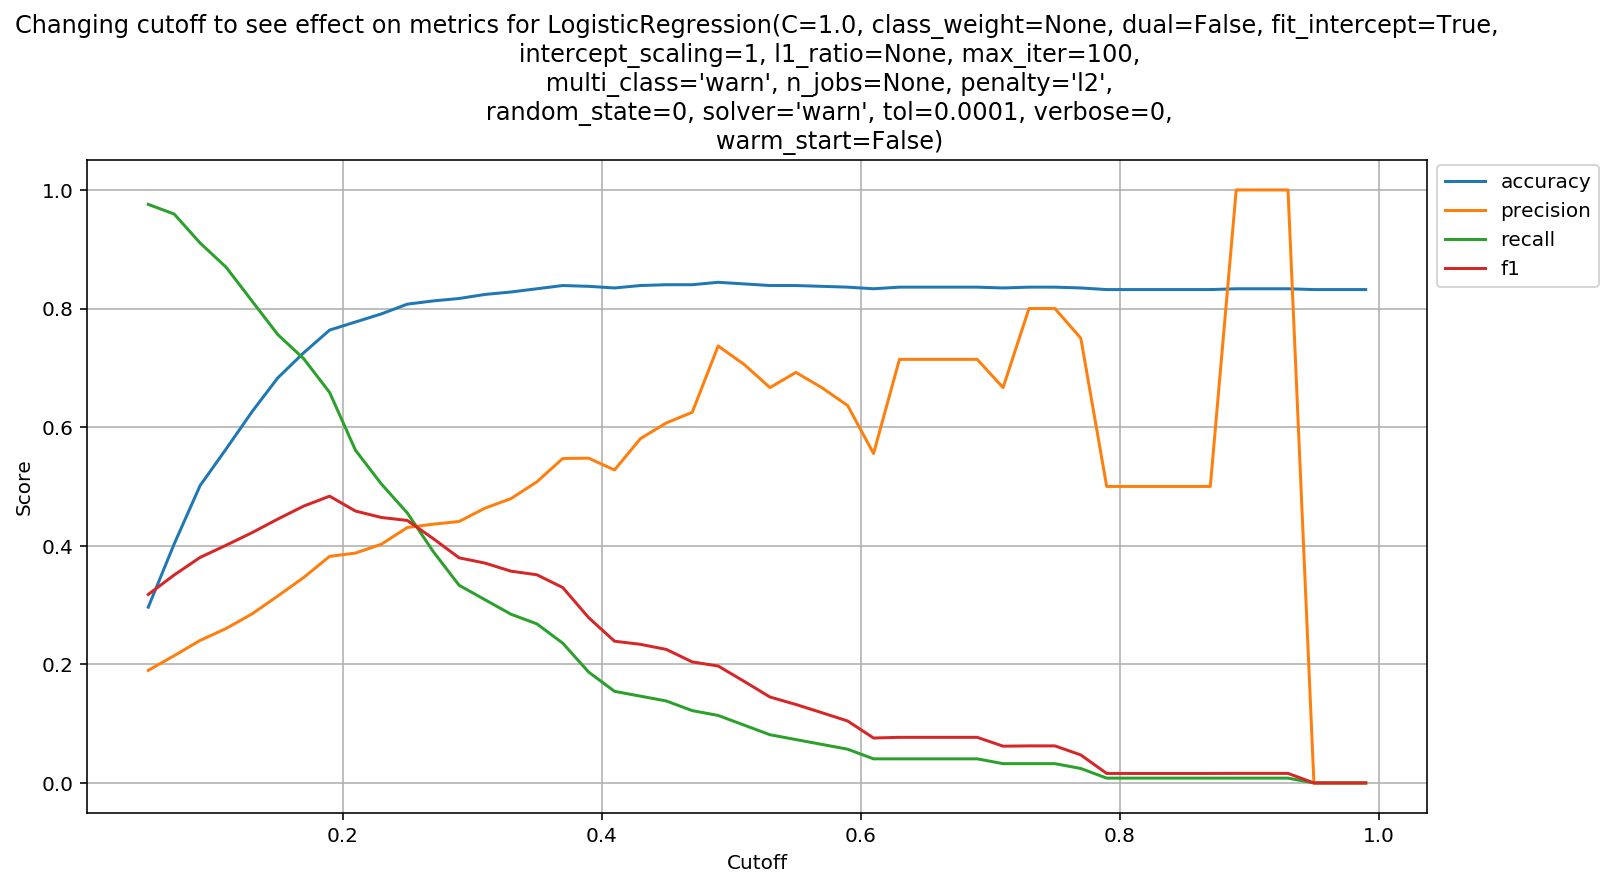

In [11]:
dataset_t = pp.chose_features(dataset_c, features=features)
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t)

#No resampling
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset 


results = []
range_x = np.arange(0.05, 1, 0.02)
algor = log_regressor(X_train, y_train)

for cutoff in range_x:
    results.append(performance(algor,X_test,y_test,cutoff=cutoff,output='All'))

results = pd.DataFrame(results,columns=['accuracy','precision','recall','f1'])
#print(results)

plt.figure(figsize=(12, 6))
for al in results.columns:
    plt.plot(range_x, results[al],label=al)
    print(al, "max=", max(results[al]))
plt.grid()
plt.title('Changing cutoff to see effect on metrics for {}'.format(str(algor)))
plt.xlabel('Cutoff')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

0.0 %, 1.25 %, 2.5 %, 3.75 %, 5.0 %, 6.25 %, 7.5 %, 8.75 %, 10.0 %, 11.25 %, 12.5 %, 13.75 %, 15.0 %, 16.25 %, 17.5 %, 18.75 %, 20.0 %, 21.25 %, 22.5 %, 23.75 %, 25.0 %, 26.25 %, 27.5 %, 28.75 %, 30.0 %, 31.25 %, 32.5 %, 33.75 %, 35.0 %, 36.25 %, 37.5 %, 38.75 %, 40.0 %, 41.25 %, 42.5 %, 43.75 %, 45.0 %, 46.25 %, 47.5 %, 48.75 %, 50.0 %, 51.25 %, 52.5 %, 53.75 %, 55.0 %, 56.25 %, 57.5 %, 58.75 %, 60.0 %, 61.25 %, 62.5 %, 63.75 %, 65.0 %, 66.25 %, 67.5 %, 68.75 %, 70.0 %, 71.25 %, 72.5 %, 73.75 %, 75.0 %, 76.25 %, 77.5 %, 78.75 %, 80.0 %, 81.25 %, 82.5 %, 83.75 %, 85.0 %, 86.25 %, 87.5 %, 88.75 %, 90.0 %, 91.25 %, 92.5 %, 93.75 %, 95.0 %, 96.25 %, 97.5 %, 98.75 %, 

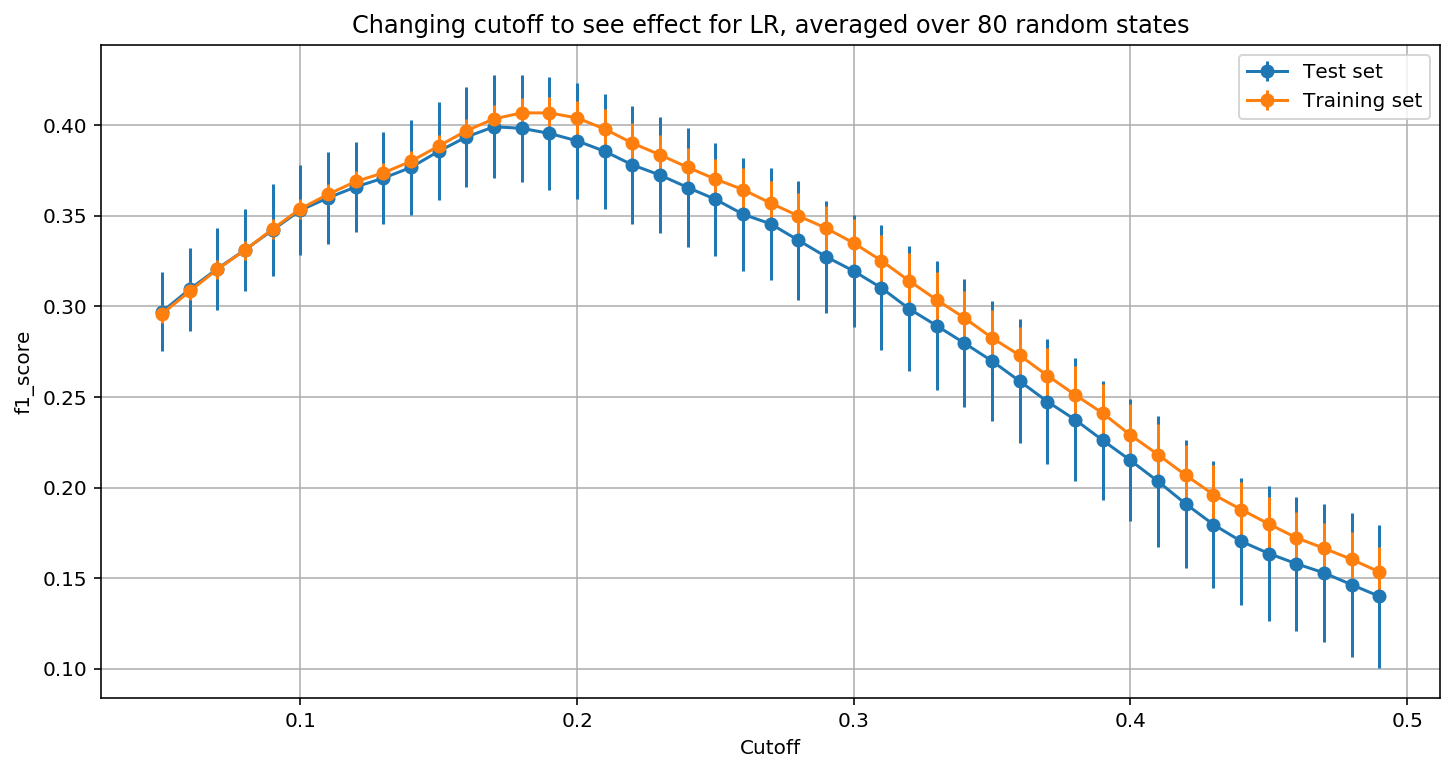

In [12]:
features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

dataset_t = pp.chose_features(dataset_c, features=features) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
dataset_t = pp.scale_data(dataset_t)
#print(dataset_t.head())
#X_train, X_test, y_train, y_test = pp.split_data(dataset_t,r_state=0) # split dataset
#LR = log_regressor(X_train, X_test, y_train, y_test, r_state=None)

    
range_x = np.arange(0.05, 0.5, 0.01)
param = 'f1_score'

coeff= []
icept = []

n_states = 80

average_array_train = pd.DataFrame()
average_array_test = pd.DataFrame()

for state in range(0,n_states):
    print(round(state/n_states*100,2),"%, ",end='')
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t,r_state=None) # split dataset
    ML = log_regressor(X_train, y_train)   
#     ML = k_neighbors(X_train, y_train)
#     ML = support_vector_m(X_train, y_train)
    
    coeff.append(ML.coef_[0])
    icept.append(ML.intercept_[0])
     
    results_train = []
    results_test = []
    for cutoff in range_x:
        
        results_test.append(performance(ML,X_test,y_test,cutoff=cutoff,output=param))
        results_train.append(performance(ML,X_train,y_train,cutoff=cutoff,output=param))
    
    average_array_train[state] = results_train
    average_array_test[state] = results_test
    
average_array_test['average'] = average_array_test.mean(axis = 1) 
average_array_test['std'] = average_array_test.std(axis = 1) 

average_array_train['average'] = average_array_train.mean(axis = 1) 
average_array_train['std'] = average_array_train.std(axis = 1) 

plt.figure(figsize=(12, 6))
plt.errorbar(range_x, average_array_test['average'],yerr=average_array_test['std'],label='Test set',marker='o')
plt.errorbar(range_x, average_array_train['average'],yerr=average_array_train['std'],label='Training set',marker='o')


plt.grid()
plt.title('Changing cutoff to see effect for LR, averaged over {} random states'.format(n_states))
plt.xlabel('Cutoff')
plt.ylabel(param)
plt.legend()

coeff = pd.DataFrame(coeff,columns=features[1:])
icept = pd.DataFrame(icept,columns=['const'])

# print(coeff)
# print(icept)
LR_av_coeffs=pd.DataFrame(coeff.mean(),columns=['mean']).join(pd.DataFrame(coeff.std(),columns=['std'])).sort_values(by='mean',ascending=False)

Index(['age', 'sysBP', 'male', 'cigsPerDay', 'glucose', 'prevalentHyp',
       'totChol', 'BPMeds', 'BMI', 'diabetes', 'const', 'heartRate', 'diaBP',
       'education'],
      dtype='object')


Text(0, 0.5, 'Coefficient')

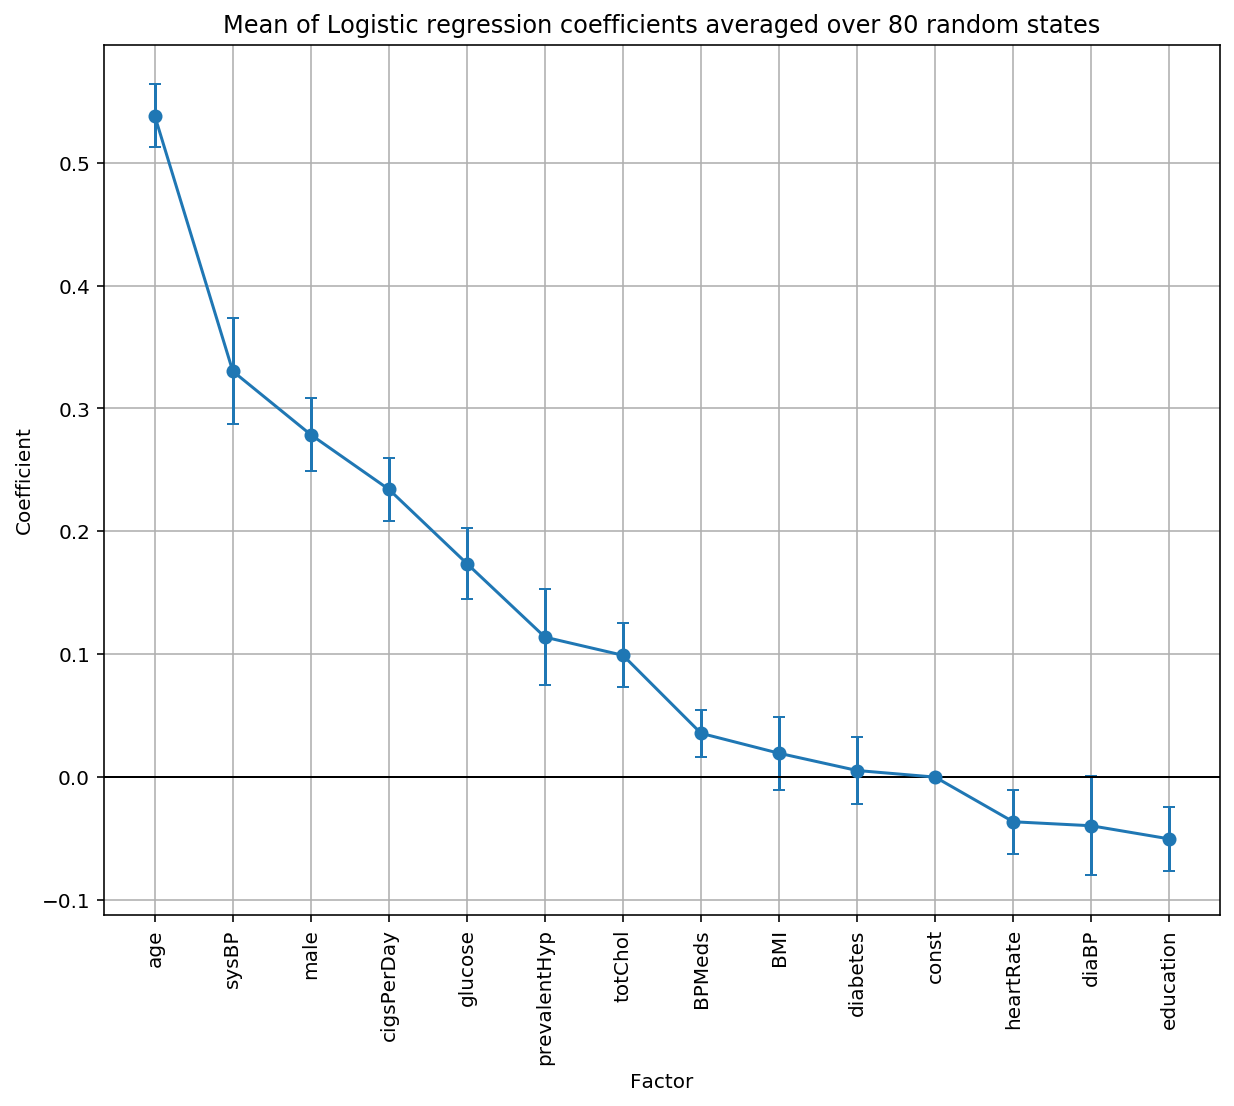

In [13]:
#investigating params for LR under different random states
print(LR_av_coeffs.T.columns)
#LR_av_coeffs.loc['const']=[icept.mean(),icept.std()]

plt.figure(figsize=(10,8))
plt.errorbar(LR_av_coeffs.T.columns,LR_av_coeffs['mean'],yerr=LR_av_coeffs['std'],capsize=3,marker='o')

plt.xticks(rotation='vertical')
plt.grid()
plt.title('Mean of Logistic regression coefficients averaged over {} random states'.format(n_states))
plt.xlabel('Factor')
plt.axhline(linewidth=1, color='k') #adds thick red line @ y=0
plt.ylabel('Coefficient')
# print(coeff)

In [ ]:
results = []

features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

dataset_t = pp.chose_features(dataset_c, features=features) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
dataset_t = pp.scale_data(dataset_t)
      
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
LR = log_regressor(X_train,y_train)
KN = k_neighbors(X_train ,y_train)
SVM = support_vector_m(X_train,y_train,class_weight='balanced')
    
range_x = np.arange(0.05, 0.5, 0.01)
param = 'f1_score'
for cutoff in range_x:
    results.append([performance(LR,X_test,y_test,cutoff=cutoff,output=param),
                    performance(KN,X_test,y_test,cutoff=cutoff,output=param),
                    performance(SVM,X_test,y_test,cutoff=cutoff,output=param),
                    performance('fram',df_fram['fram_percent'],df_fram['TenYearCHD'],cutoff=cutoff,output= param)
                   ])

results=pd.DataFrame(results,columns=('LR','KN','SVM','FRAM'))
#print(results)

plt.figure(figsize=(12, 6))
for al in results.columns:
    plt.plot(range_x, results[al],label=al,marker='o')
    print(al, "max=", max(results[al]))
plt.grid()
plt.title('Changing cutoff to see effect for ML algorithms')
plt.xlabel('Cutoff')
plt.ylabel(param)
plt.legend()




In [14]:
#Investigating resampling

def t_resampling(dataset,algorithm=log_regressor,cutoff=0.5,metric='Accuracy'):
    '''Investigate the effects of resampling and make plots
    
    '''

    features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
                'diabetes', 'BPMeds', 'male', 'BMI',
                'education', 'heartRate','prevalentStroke'] 

    results = []
#     cutoff = 0.35

    dataset_t = pp.chose_features(dataset, features=features) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    dataset_t = pp.scale_data(dataset_t) 

    #with resampling
    train, test = pp.split_data(dataset_t,split_dep_var=False) # split into train and test
    X_test, y_test = pp.split_dep_var(test) # Don't mess with the test set!

    range_r = np.arange(0.2, 1.01, 0.05)

    for ratio in range_r:
        X_train_up, y_train_up = pp.split_dep_var(pp.upsample(train,ratio_1_to_0=ratio))
        X_train_down, y_train_down = pp.split_dep_var(pp.downsample(train,ratio_1_to_0=ratio))
        X_train_none, y_train_none = pp.split_dep_var(train)

        LR = algorithm(X_train_up, y_train_up)
        results_up = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)

        LR = algorithm(X_train_down, y_train_down)
        results_down = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)

        LR = algorithm(X_train_none, y_train_none)
        results_none = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)


        results.append([results_up,results_down,results_none])

    results = pd.DataFrame(results,columns=['Upsampled','Downsample','Unbalanced'])


#     plt.figure(figsize=(12, 6))
#     print('\n{} summary:'.format(str(algorithm)))
    for method in results.columns:
        plt.plot(range_r, results[method],label='{} cutoff: {}'.format(method,cutoff),marker='o')
#         print(method, "max={:.4f}".format(max(results[method])))

    plt.grid()
    plt.title('Changing ratio_1_to_0 to see effect on \n{} for resampling methods for {}'.format(metric,str(algorithm)))
    plt.xlabel('ratio_1_to_0')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1, 0.9))



In [ ]:
# range_cutoff = np.arange(0.5000001, 0.3, -0.1)

# # plt.figure(figsize=(12, 6))
# # for cut in range_cutoff:
# #     t_resampling(dataset_c,algorithm=log_regressor,cutoff=cut,metric='Accuracy')

# plt.figure(figsize=(12, 6))
# for cut in range_cutoff:
#     t_resampling(dataset_c,algorithm=log_regressor,cutoff=cut,metric='Accuracy')
    
# plt.figure(figsize=(12, 6))
# for cut in range_cutoff:
#     t_resampling(dataset_c,algorithm=log_regressor,cutoff=cut,metric='Recall')

plt.figure(figsize=(12, 6))
t_resampling(dataset_c,algorithm=log_regressor,metric='Accuracy')

plt.figure(figsize=(12, 6))
t_resampling(dataset_c,algorithm=log_regressor,metric='Recall')

0.0 %, 6.25 %, 12.5 %, 18.75 %, 25.0 %, 31.25 %, 37.5 %, 43.75 %, 50.0 %, 56.25 %, 62.5 %, 68.75 %, 75.0 %, LR accuracy max=0.8302
KN accuracy max=0.8090
SVM accuracy max=0.8302
FRAM accuracy max=0.8475


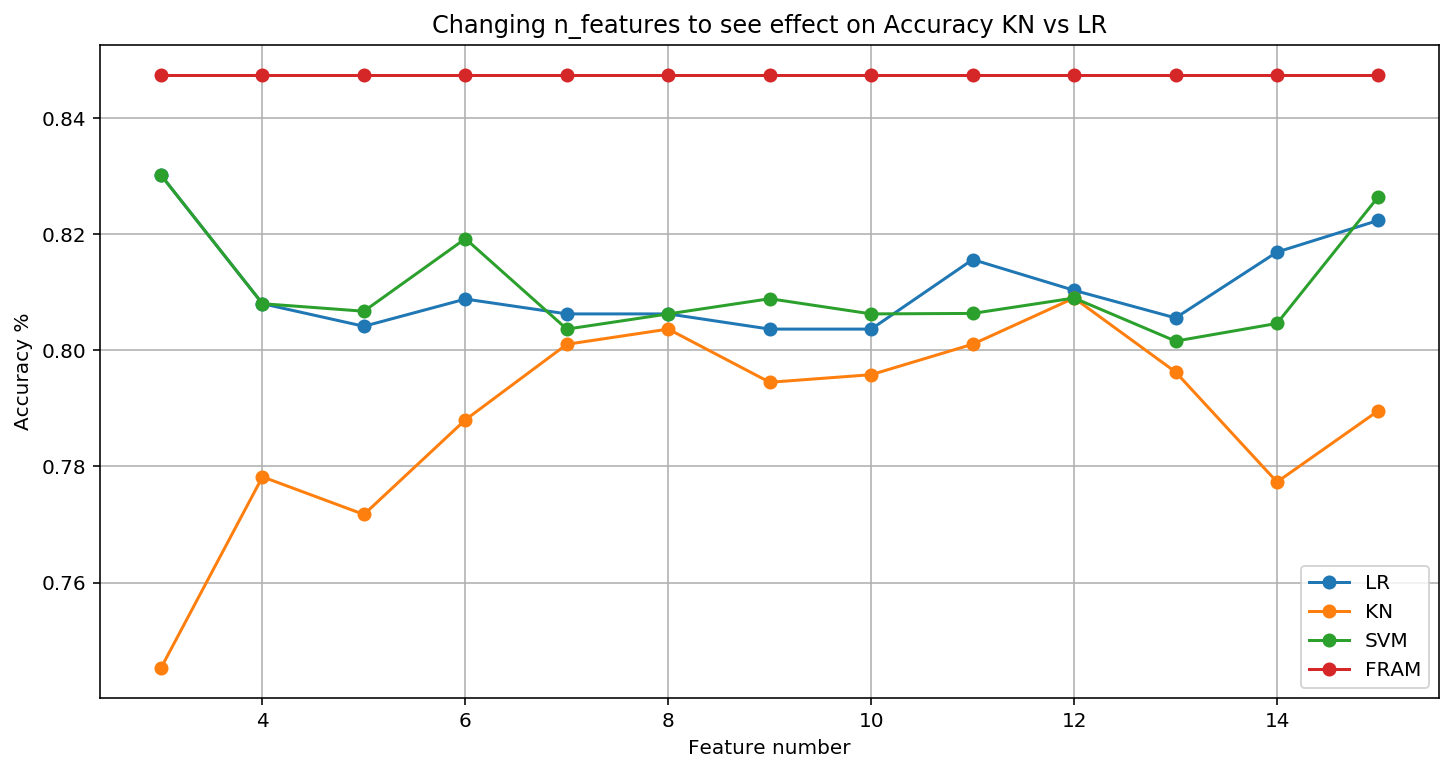

In [15]:
### COMPARE ALGORITHMS AT CONST CUTOFF
###
### - This is MISLEADING as distributions are NOT the same/ symmetric for all algorithms
### - This means that at constant cutoff some algorithms will come out much better. Instead we should OPTIMISE 
###   the cutoff for each algorithm and then plot a similar graph
###


results = []



features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate'] #remove prevalentStroke

dataset_c = add_constant(dataset)

param = 'Accuracy'
cutoff=0.3

#Investigate effect of no. features
for i in range(3,len(features)+1):
    print((i-3)/(len(features)+1)*100,'%, ',end='')
    dataset_t = pp.chose_features(dataset_c, features=features[:i]) # choose n features

    dataset_t = pp.drop_missing(dataset_t) # drop missing rows



    dataset_t = pp.scale_data(dataset_t)

    
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
   
    LR = log_regressor(X_train,y_train)
    KN = k_neighbors(X_train,y_train)
    SVM = support_vector_m(X_train,y_train)
    
    
    results.append([performance(LR,X_test,y_test,cutoff=cutoff,output= param),
                    performance(KN,X_test,y_test,cutoff=cutoff,output= param),
                    performance(SVM,X_test,y_test,cutoff=cutoff,output= param),
                    performance('fram',df_fram['fram_percent'],df_fram['TenYearCHD'],cutoff=cutoff,output= param)
                   ])
    
    
    

results = pd.DataFrame(results,columns=['LR','KN','SVM','FRAM'])



plt.figure(figsize=(12, 6))
for algor in results.columns:
    plt.plot(range(3,i+1), results[algor], label=algor,marker='o')
    print(algor, "accuracy max={:.4f}".format(max(results[algor])))

plt.grid()
plt.title('Changing n_features to see effect on {} KN vs LR'.format(param))
plt.xlabel('Feature number')
plt.ylabel('{} %'.format(param))
plt.legend()






In [16]:
def multilayer_opt(dataset, v=0):
    
    dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    dataset_t = pp.upsample(dataset_t) #upsample data 
    dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
    train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
    train = pp.upsample(train, v=0)
    X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)
    
    
    from sklearn.neural_network import MLPClassifier
    MLP = MLPClassifier(hidden_layer_sizes=(1,), activation= 'identity', solver='sgd', alpha=0.05, random_state=0)
    MLP.fit(X_train, y_train) 
    y_pred = MLP.predict(X_test)
    
    if v == 1:
        print('running multilayer perceptrons')
        accuracy = accuracy_score(y_pred, y_test)
        print('\nAccuracy is:', accuracy)
        classification = classification_report(y_test, y_pred)
        print(classification)
        
    return MLP
    

roc auc for LR: 0.7237264709591121
roc auc for KN: 0.7803964425499509
roc auc for SVM: 0.7267305728562705
roc auc for framingham: 0.6877080249204374


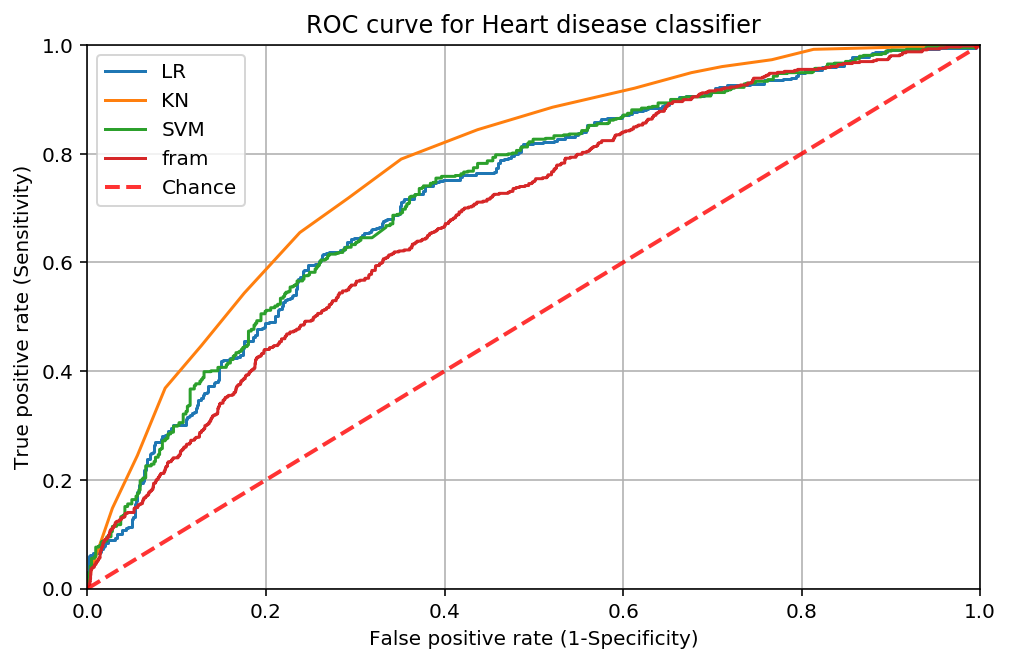

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score
features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']
# n_features = 12
# dataset_t = pp.chose_features(dataset_c, features=features[:n_features]) # choose n features
# dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
# dataset_t = pp.scale_data(dataset_t)
      
# X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
LR = log_regressor(X_train, y_train) 
KN = k_neighbors(X_train, y_train) 
SVM = support_vector_m(X_train, y_train) 

plt.figure(figsize = (8,5))

y_pred_prob_yes=LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label ='LR')
print('roc auc for LR:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

y_pred_prob_yes=KN.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label ='KN')
print('roc auc for KN:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

y_pred_prob_yes=SVM.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label ='SVM')
print('roc auc for SVM:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
fpr, tpr, thresholds = roc_curve(df_fram.TenYearCHD, df_fram.fram_percent)
plt.plot(fpr,tpr,label ='fram')
print('roc auc for framingham:',roc_auc_score(df_fram.TenYearCHD, df_fram.fram_percent))

#MLP = multilayer_opt(dataset, v=1)
#MLP
#dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
#dataset_t = pp.drop_missing(dataset_t) # drop missing rows
#dataset_t = pp.upsample(dataset_t) #upsample data 
#dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
#train, test = pp.split_data(dataset_t, split_dep_var=False) # split dataset
#train = pp.upsample(train, v=0)
#X_train, y_train = pp.split_dep_var(train);X_test, y_test = pp.split_dep_var(test)
#y_pred_prob_yes=MLP.predict_proba(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
#plt.plot(fpr,tpr,label ='MLP')
#print('roc auc for MLP:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend()


In [ ]:
roc_auc_df = []
features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']
import math



for n_features in range(5,len(features)+1):
    dataset_t = pp.chose_features(dataset_c, features=features[:n_features]) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
    dataset_t = pp.scale_data(dataset_t)

    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    LR = log_regressor(X_train, X_test, y_train, y_test)
    KN = k_neighbors(X_train, X_test, y_train, y_test)
    row = [0,0,0]

    y_pred_prob_yes=LR.predict_proba(X_test)
    row[0] = roc_auc_score(y_test,y_pred_prob_yes[:,1])
  

    y_pred_prob_yes=KN.predict_proba(X_test)
    row[1] = roc_auc_score(y_test,y_pred_prob_yes[:,1])
    
    row[2] = roc_auc_score(df_fram.TenYearCHD, df_fram.fram_percent)
    roc_auc_df.append(row)
    
roc_auc_df=pd.DataFrame(roc_auc_df,columns=['LR','KN','FRAM'])

plt.figure(figsize(10,8))
for col in roc_auc_df.columns:
    plt.plot(list(range(5,len(features)+1)),roc_auc_df[col],label=col)
plt.grid(True)
plt.title('ROC AUC to compare different alogithms')
plt.xlabel('# features')
plt.ylabel('ROC AUC')

plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('\nCalculating linear regressor...\n')
LR = LogisticRegression(random_state=0)
LR = LR.fit(X_train, y_train)
print(LR)

y_pred = LR.predict(X_test)

print('Confusion Matrix:')
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
print(confusion_matrix(y_test,y_pred))

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test,y_pred))



In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('True Positives: {}, True Negatives: {}, False Positives (Type 1 error): {}, False Negatives (Type 2 error): {}\n'
     .format(TP,TN,FP,FN))
    
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


#From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.


In [ ]:
from statsmodels.tools import add_constant as add_constant
dataset2 = add_constant(dataset)
dataset2.head()
dataset2 = pp.drop_missing(dataset2)

LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train) 
cols=dataset2.columns[:-1]
model=sm.Logit(dataset2.TenYearCHD,dataset2[cols])
result=model.fit()
result.summary()

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(dataset2,dataset2.TenYearCHD,cols)
result.summary()

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

In [ ]:
# dataset2=pp.chose_features(dataset,features=['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD'])
# dataset2=pp.drop_missing(dataset2)
# X_train,X_test,y_train,y_test=pp.split_data(dataset2)

# log_regressor(X_train, X_test, y_train, y_test)
import sklearn
new_features=dataset[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
new_features=pp.drop_missing(dataset,v=1)
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test=pp.split_data(new_features,test_size=.20)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

sklearn.metrics.accuracy_score(y_test,y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=LR.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n')
    


The following is implemented above

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
if count>0:
    print(count, 'Rows(or', round((count/len(dataset.index))*100), '%) with missing values are dropped out of total', str(len(dataset.index)))
    dataset.dropna(axis=0,inplace=True)
    print('Now dataset has', len(dataset.index),' rows')

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score as score
print('Accuracy:')
print(score(y_test,y_pred)*100)